In [231]:
# !pip install tensorflow

In [232]:
# !pip show keras

In [233]:
import numpy as np
import urllib.request
import gzip

def load_mnist_images(url):
    with urllib.request.urlopen(url) as resp, gzip.GzipFile(fileobj=resp) as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28*28) / 255.0

def load_mnist_labels(url):
    with urllib.request.urlopen(url) as resp, gzip.GzipFile(fileobj=resp) as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

def fetch_mnist_local():
    base_url = "https://storage.googleapis.com/cvdf-datasets/mnist/"
    X_train = load_mnist_images(base_url + "train-images-idx3-ubyte.gz")
    y_train = load_mnist_labels(base_url + "train-labels-idx1-ubyte.gz")
    X_test = load_mnist_images(base_url + "t10k-images-idx3-ubyte.gz")
    y_test = load_mnist_labels(base_url + "t10k-labels-idx1-ubyte.gz")
    X = np.vstack([X_train, X_test])
    y = np.hstack([y_train, y_test])
    return {"data": X, "target": y}

mnist = fetch_mnist_local()
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)  


(70000, 784) (70000,)


In [234]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

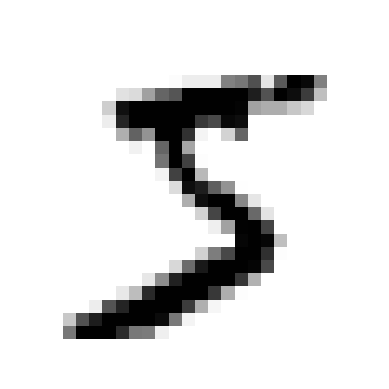

In [235]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()    

In [236]:
y[0]

5

In [237]:
x_train,x_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [238]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [239]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [240]:
sgd_classifier.predict([some_digit])

array([ True])

In [241]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.9748, 0.9657, 0.9692])

In [242]:
from sklearn.dummy import DummyClassifier

dummy_clas = DummyClassifier()
dummy_clas.fit(x_train,y_train_5)

DummyClassifier()

In [243]:
dummy_clas.predict(x_train)

array([False, False, False, ..., False, False, False])

In [244]:
cross_val_score(dummy_clas,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [245]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier,x_train,y_train_5,cv=3)

In [246]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53613,   966],
       [  840,  4581]], dtype=int64)

In [247]:
from sklearn.metrics import precision_score,recall_score

print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8258518117901569
0.8450470392916436


In [248]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.8353391684901532

In [249]:
y_scores = sgd_classifier.decision_function([some_digit])
y_scores

array([0.49010893])

In [250]:
# threshold = 0
# y_some_digit_pred = (y_scores>threshold)
# y_some_digit_pred

In [251]:
threshold = 3000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [252]:
y_scores = cross_val_predict(sgd_classifier,x_train,y_train_5,cv=3,method="decision_function")

In [253]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

(-10.0, 10.0)

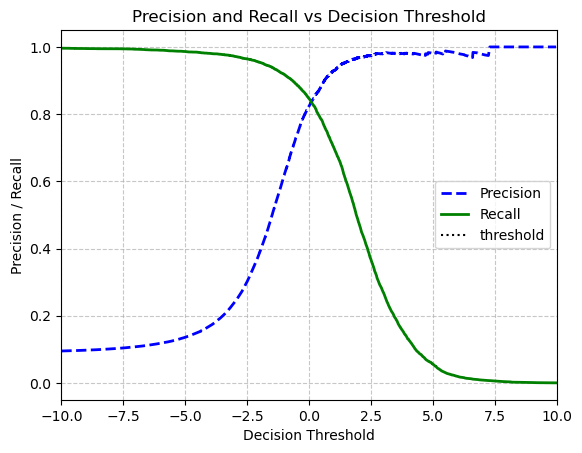

In [254]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(loc="best")
plt.xlabel("Decision Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision and Recall vs Decision Threshold")
plt.xlim(-10,10)

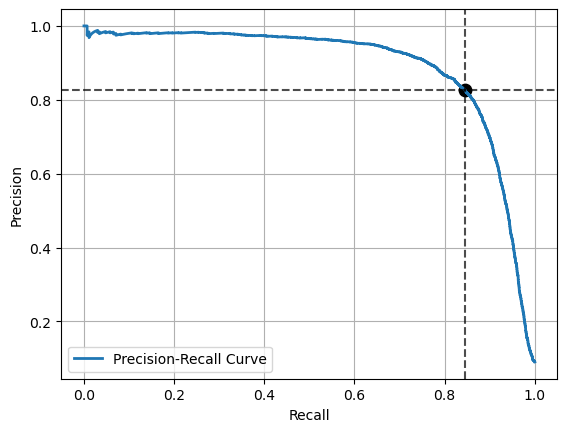

In [255]:
plt.plot(recalls,precisions,linewidth = 2 , label = "Precision-Recall Curve")
plt.grid(True)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc = "lower left")
thr = 0.0
closest_idx = (abs(thresholds-thr)).argmin()
plt.scatter(recalls[closest_idx],precisions[closest_idx],color = "Black",s=80)
plt.axvline(x=recalls[closest_idx], color="Black", linestyle="--", alpha=0.7)
plt.axhline(y=precisions[closest_idx], color="Black", linestyle="--", alpha=0.7)
plt.show()

In [256]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

0.6060137354660038

In [257]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [258]:
precision_score(y_train_5,y_train_pred_90)

0.9001305483028721

In [259]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.7631433314886552

In [260]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

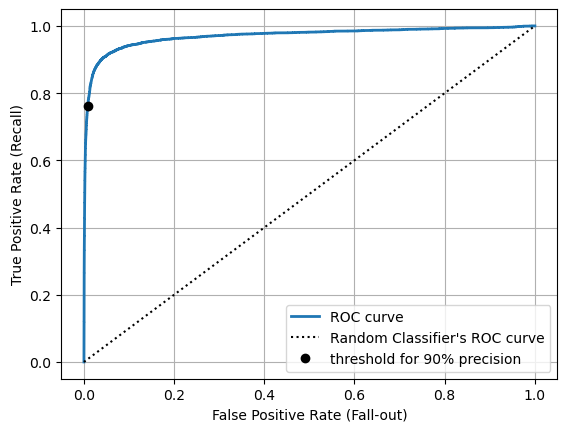

In [261]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]

plt.plot(fpr,tpr,linewidth = 2 , label = "ROC curve")
plt.plot([0,1],[0,1],'k:',label="Random Classifier's ROC curve")
plt.plot([fpr_90],[tpr_90],"ko",label = "threshold for 90% precision")
plt.grid(True)
plt.legend(loc = "lower right")
plt.ylabel("True Positive Rate (Recall)")
plt.xlabel("False Positive Rate (Fall-out)")
plt.show()

In [262]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9704522882419195

In [263]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [264]:
y_probas_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method="predict_proba")

In [265]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [266]:
y_scores_forest = y_probas_forest[:,1]
precision_forest,recall_forest,threshold_forest = precision_recall_curve(y_train_5,y_scores_forest)

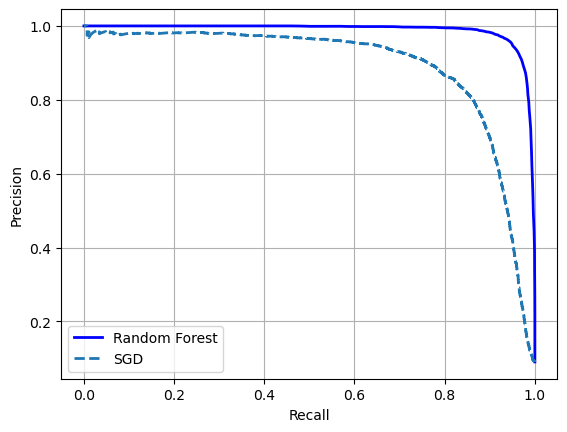

In [267]:
plt.plot(recall_forest,precision_forest,"b-",linewidth = 2,label = "Random Forest")
plt.plot(recalls,precisions,"--",linewidth=2,label = "SGD")
plt.grid(True)
plt.legend(loc = "lower left")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [268]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [269]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983400347444625

In [270]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
svc_clf.fit(x_train[:2000],y_train[:2000])

SVC(random_state=42)

In [271]:
svc_clf.predict([some_digit])

array([5], dtype=uint8)

In [272]:
some_digit_scores = svc_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [273]:
class_id = some_digit_scores.argmax()
class_id

5

In [274]:
svc_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [275]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [276]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [277]:
sgd_clf.decision_function([some_digit]).round(2)

array([[ -5.65,  -8.66,  -5.06,  -0.64, -10.95,   1.29,  -7.14,  -4.35,
         -6.52,  -6.63]])

In [278]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")

array([0.90905, 0.90645, 0.91525])

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

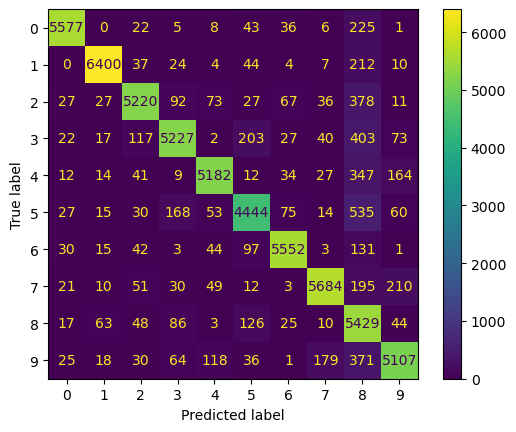

In [280]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

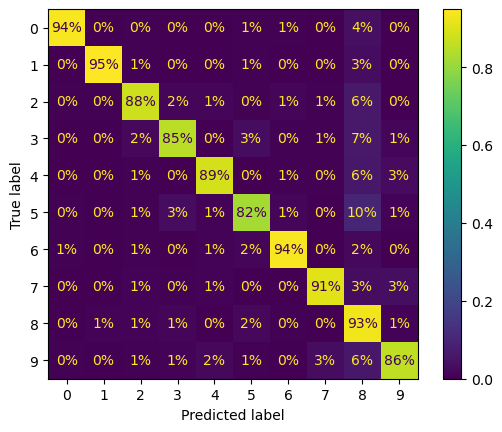

In [281]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="true",values_format=".0%")
plt.show()

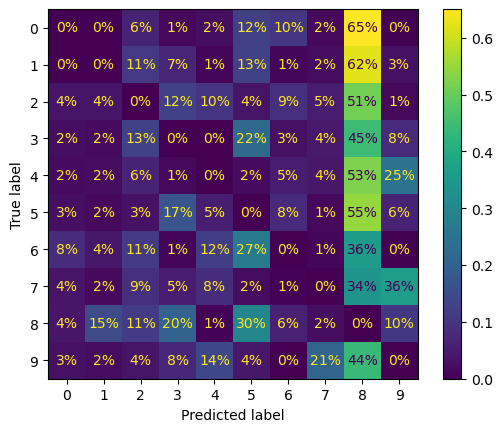

In [282]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="true",values_format=".0%")
plt.show()

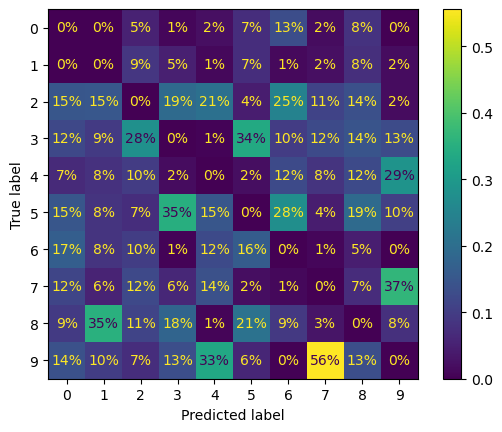

In [283]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize="pred",values_format=".0%")
plt.show()

In [293]:
cl_a, cl_b = 3, 5
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [294]:
print(cl_a, cl_b)


3 5


In [295]:
print(len(X_ba), len(X_bb), len(X_aa), len(X_ab))

168 4444 5227 203


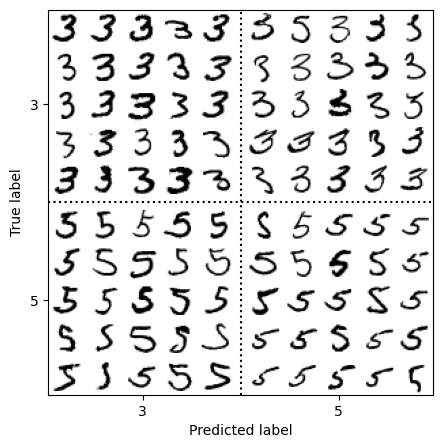

In [296]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [297]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier()

In [298]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [299]:
y_train_knn_pred = cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.9764102655606048

In [300]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(x_train[:2000],y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [301]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [371]:
np.random.seed(42)

noise = np.random.normal(0, 20, x_train.shape)  
x_train_mod_1 = np.clip(x_train + noise, 0, 584)

noise = np.random.normal(0, 20, x_test.shape)  
x_test_mod_1 = np.clip(x_test + noise, 0, 584)

y_train_mod_1 = x_train
y_test_mod_1 = x_test


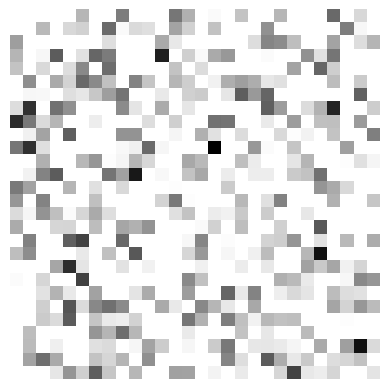

In [ ]:
plt.subplot(); plot_digit(x_test_mod_1[1])
plt.show()

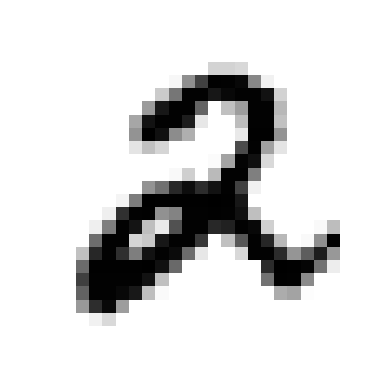

In [378]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
knn_reg = KNeighborsRegressor(n_neighbors=1)
knn_reg.fit(x_train_mod_1, y_train_mod_1)
clean_digit = knn_reg.predict([x_test_mod_1[1]])
plot_digit(clean_digit)
plt.show()
